<a href="https://colab.research.google.com/github/siri2511/Deep-Learning/blob/main/ArtificialNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


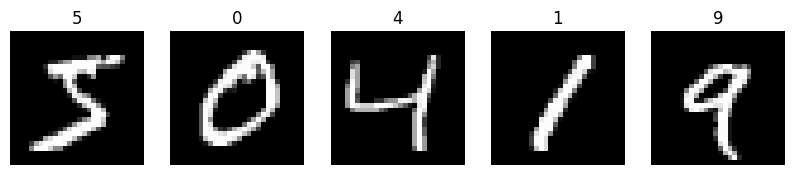

Training set size:60000samples
Test set size:10000samples


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8603 - loss: 0.4736 - val_accuracy: 0.9537 - val_loss: 0.1535
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9627 - loss: 0.1220 - val_accuracy: 0.9681 - val_loss: 0.1097
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9766 - loss: 0.0763 - val_accuracy: 0.9671 - val_loss: 0.1090
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9821 - loss: 0.0570 - val_accuracy: 0.9707 - val_loss: 0.1019
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9883 - loss: 0.0401 - val_accuracy: 0.9728 - val_loss: 0.1006
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9896 - loss: 0.0327 - val_accuracy: 0.9682 - val_loss: 0.1232
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9901 - loss: 0.0300 - val_accuracy: 0.9707 - val_loss: 0.1134
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9931 - loss: 0.0

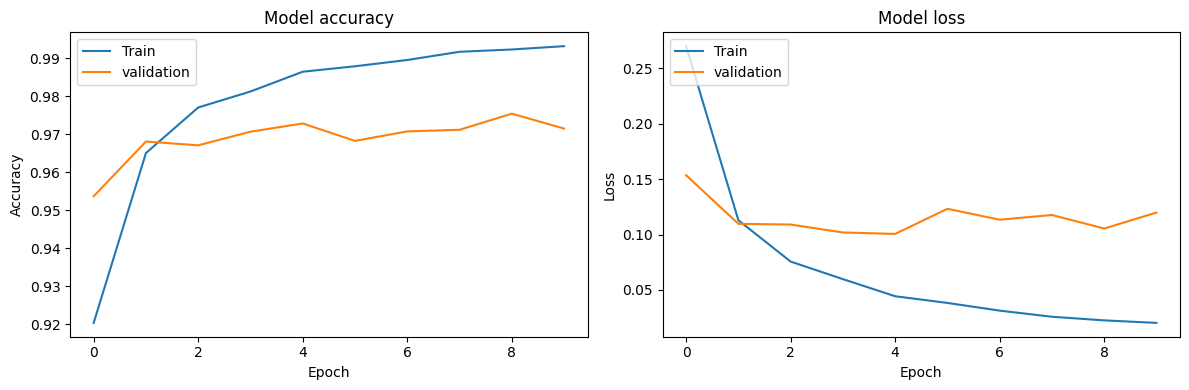

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()
X_train=X_train/255.0
X_test=X_test/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
def plot_images(images,labels,num_images):
  plt.figure(figsize=(10,10))
  for i in range(num_images):
    plt.subplot(1,num_images,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(np.argmax(labels[i]))
    plt.axis('off')
  plt.show()
plot_images(X_train,y_train,5)
print(f"Training set size:{X_train.shape[0]}samples")
print(f"Test set size:{X_test.shape[0]}samples")
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
loss,accuracy=model.evaluate(X_test,y_test)
print(f"Test Accuracy:{accuracy*100:.2f}%")
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.tight_layout()
plt.show()